<a href="https://colab.research.google.com/github/rafaael1/RegressaoT3/blob/main/Unidade_9_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: Implementar e avaliar o desempenho do algoritmo de Regressão Linear em um
conjunto de dados real, documentando o processo em um relatório técnico.

____________________________________________________________________________________________________

Descrição da Avaliação


O objetivo deste projeto é desenvolver um modelo preditivo usando o algoritmo de
Regressão Linear para resolver um problema de inferência sobre taxa de engajamento dos
principais influenciadores do instagram. O projeto envolve desde a análise exploratória dos
dados até a otimização e validação do modelo, além da produção de um relatório técnico em
PDF documentando todas as etapas, para ser incluído no repositório GitHub junto ao
código-fonte.

Dataset: [Top Instagram Influencers Data](https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned)

In [283]:
import pandas as pd
import numpy as np
url = ("https://www.kaggle.com/api/v1/datasets/download/surajjha101/top-instagram-influencers-data-cleaned/top_insta_influencers_data.csv")

insta = pd.read_csv(url)
insta.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [284]:
# altera os nomes das colunas
insta.columns = [
    'Rank',
    'Nome_usuario',
    'Pontuacao_influencia',
    'Posts',
    'Seguidores',
    'Media_curtidas',
    'Taxa_engajamento',
    'Media_novos_posts_curtidos',
    'Total_curtidas',
    'Paises']

In [285]:
insta.head()

,Rank,Nome_usuario,Pontuacao_influencia,Posts,Seguidores,Media_curtidas,Taxa_engajamento,Media_novos_posts_curtidos,Total_curtidas,Paises
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [286]:
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Rank                        200 non-null    int64 
 1   Nome_usuario                200 non-null    object
 2   Pontuacao_influencia        200 non-null    int64 
 3   Posts                       200 non-null    object
 4   Seguidores                  200 non-null    object
 5   Media_curtidas              200 non-null    object
 6   Taxa_engajamento            200 non-null    object
 7   Media_novos_posts_curtidos  200 non-null    object
 8   Total_curtidas              200 non-null    object
 9   Paises                      138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [287]:
# Função para converter valores como 'k', 'm', 'b', '%' para números reais
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1_000_000_000
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    return value

# Aplicar a conversão em colunas relevantes
colunas_para_converter = ['Posts', 'Seguidores', 'Media_curtidas', 'Taxa_engajamento', 'Media_novos_posts_curtidos', 'Total_curtidas']
for coluna in colunas_para_converter:
    if coluna in insta.columns:
        insta[coluna] = insta[coluna].apply(convert_to_numeric)

# Exibir uma amostra após a conversão
insta.head()

,Rank,Nome_usuario,Pontuacao_influencia,Posts,Seguidores,Media_curtidas,Taxa_engajamento,Media_novos_posts_curtidos,Total_curtidas,Paises
0,1,cristiano,92,3300.0,475800000.0,8700000.0,0.0139,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,0.0162,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,0.0124,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.0097,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.0020,665300.0,1.250000e+10,United States


In [288]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(insta.isna().sum())


Valores ausentes por coluna:
Rank                           0
Nome_usuario                   0
Pontuacao_influencia           0
Posts                          0
Seguidores                     0
Media_curtidas                 0
Taxa_engajamento               1
Media_novos_posts_curtidos     0
Total_curtidas                 0
Paises                        62
dtype: int64


In [289]:
# Tratar valores ausentes (remoção ou substituição)
insta.dropna(subset=['Taxa_engajamento', 'Seguidores'], inplace=True)

# Exibir informações após tratar valores ausentes
print("Após tratar valores ausentes:")
print(insta.info())

Após tratar valores ausentes:
<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        199 non-null    int64  
 1   Nome_usuario                199 non-null    object 
 2   Pontuacao_influencia        199 non-null    int64  
 3   Posts                       199 non-null    float64
 4   Seguidores                  199 non-null    float64
 5   Media_curtidas              199 non-null    float64
 6   Taxa_engajamento            199 non-null    float64
 7   Media_novos_posts_curtidos  199 non-null    object 
 8   Total_curtidas              199 non-null    float64
 9   Paises                      138 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 17.1+ KB
None


Estatísticas descritivas do conjunto de dados Top Instagram Influencers Data

In [290]:
insta.describe()

,Rank,Pontuacao_influencia,Posts,Seguidores,Media_curtidas,Taxa_engajamento,Total_curtidas
count,199.000000,199.000000,199.000000,1.990000e+02,1.990000e+02,199.000000,1.990000e+02
mean,100.160804,81.814070,3516.884422,7.761256e+07,1.741310e+06,0.019020,3.670465e+09
std,57.825532,8.900153,3476.215047,7.381699e+07,2.100856e+06,0.033297,5.573215e+09
min,1.000000,22.000000,10.000000,3.280000e+07,6.510000e+04,0.000100,1.830000e+07
25%,50.500000,80.000000,950.000000,4.005000e+07,5.031000e+05,0.004100,9.937000e+08
50%,100.000000,84.000000,2100.000000,5.020000e+07,1.100000e+06,0.008800,2.000000e+09
75%,149.500000,86.000000,5050.000000,6.890000e+07,2.100000e+06,0.020350,4.000000e+09
max,200.000000,93.000000,17500.000000,4.758000e+08,1.540000e+07,0.264100,5.740000e+10


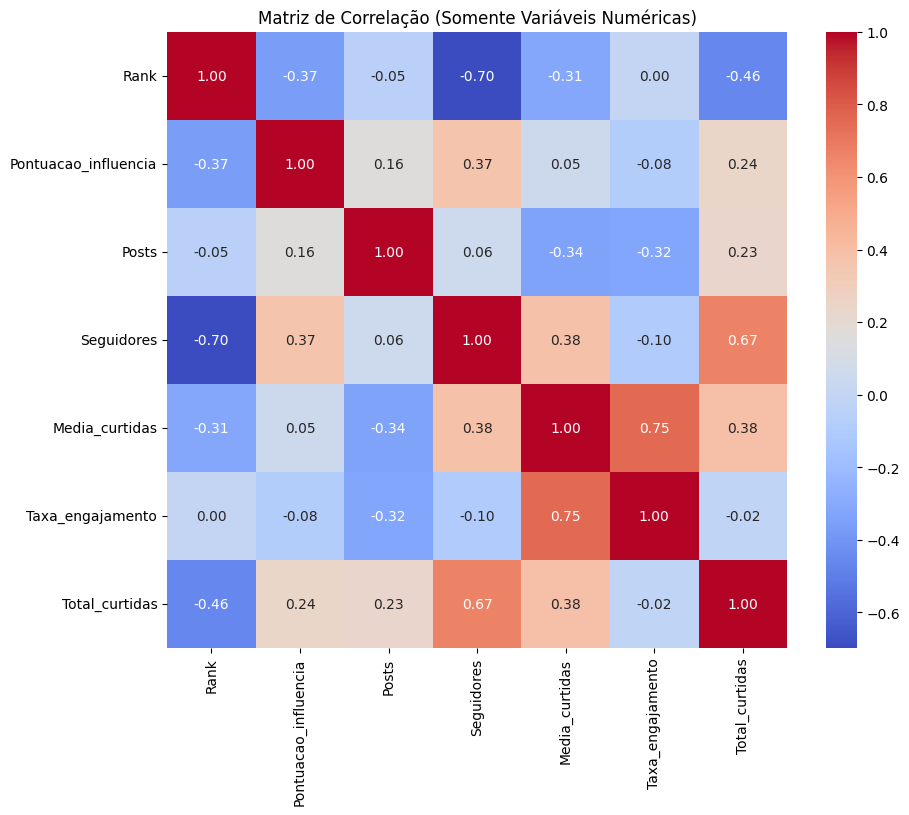

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas colunas numéricas
numeric_columns = insta.select_dtypes(include=['float64', 'int64']).columns

# Calcular a correlação somente para colunas numéricas
correlation_matrix = insta[numeric_columns].corr()

# Criar um heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlação (Somente Variáveis Numéricas)')
plt.show()

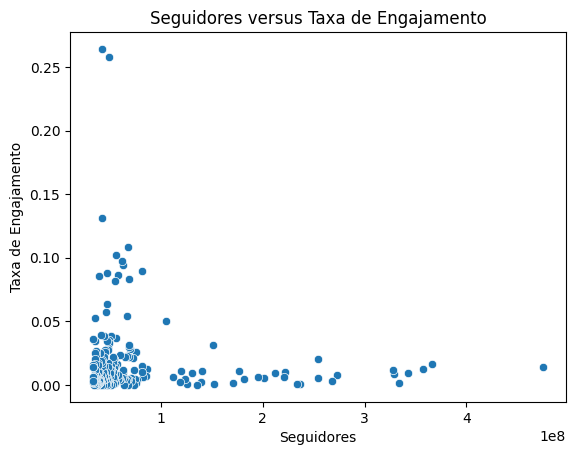

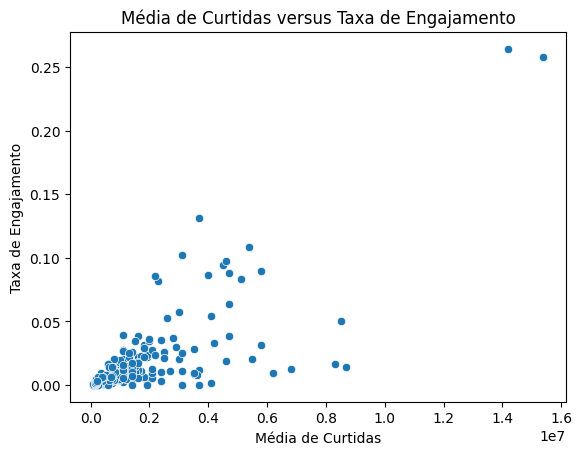

In [292]:
# Relação entre Seguidores e Taxa de Engajamento
sns.scatterplot(data=insta, x='Seguidores', y='Taxa_engajamento')
plt.title('Seguidores versus Taxa de Engajamento')
plt.xlabel('Seguidores')
plt.ylabel('Taxa de Engajamento')
plt.show()

# Relação entre Média de Curtidas e Taxa de Engajamento
sns.scatterplot(data=insta, x='Media_curtidas', y='Taxa_engajamento')
plt.title('Média de Curtidas versus Taxa de Engajamento')
plt.xlabel('Média de Curtidas')
plt.ylabel('Taxa de Engajamento')
plt.show()

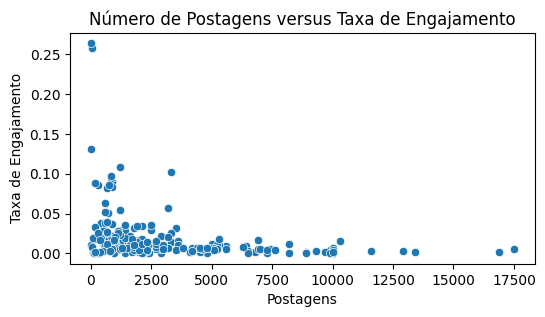

In [293]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=insta, x='Posts', y='Taxa_engajamento')
plt.title('Número de Postagens versus Taxa de Engajamento')
plt.xlabel('Postagens')
plt.ylabel('Taxa de Engajamento')
plt.show()

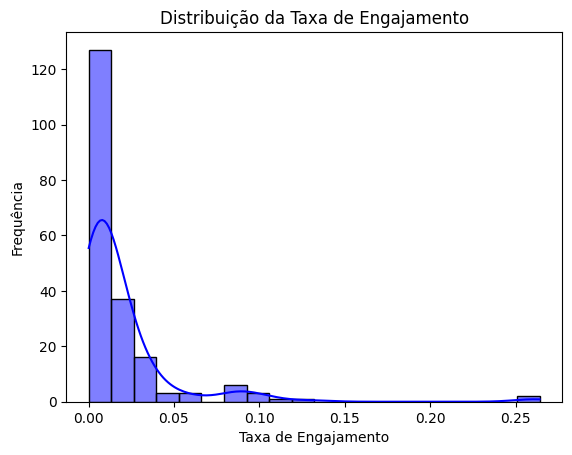

In [294]:
# Distribuição da Taxa de Engajamento
sns.histplot(insta['Taxa_engajamento'], kde=True, bins=20, color='blue')
plt.title('Distribuição da Taxa de Engajamento')
plt.xlabel('Taxa de Engajamento')
plt.ylabel('Frequência')
plt.show()

Implementação

In [295]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Dividindo dados em conjuntos de treinamento e teste para avaliação de modelo

In [296]:
# Escolher variáveis dependente e independentes
X = insta[['Seguidores', 'Media_curtidas', 'Posts', 'Media_novos_posts_curtidos', 'Pontuacao_influencia']]
y = insta['Taxa_engajamento']

In [297]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42
)

In [298]:
# Verificar se há valores ausentes em X_train, X_test, y_train, y_test
print("Valores ausentes em X_train:", X_train.isna().sum().sum())
print("Valores ausentes em y_train:", y_train.isna().sum())

Valores ausentes em X_train: 0
Valores ausentes em y_train: 0


In [299]:
# Cria e treina o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Faz previsões
y_pred = model.predict(X_test)

# Avalia o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

Mean Squared Error (MSE): 3.265431744220391e-05
Coeficiente de Determinação (R²): 0.9470563531707645


In [300]:
# Exibe os coeficientes do modelo com os nomes das variáveis
coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': model.coef_
})

print(coef_df)

                     Variável   Coeficiente
0                  Seguidores -1.982232e-10
1              Media_curtidas  1.569596e-09
2                       Posts -5.414730e-08
3  Media_novos_posts_curtidos  1.623897e-08
4        Pontuacao_influencia  1.948975e-04


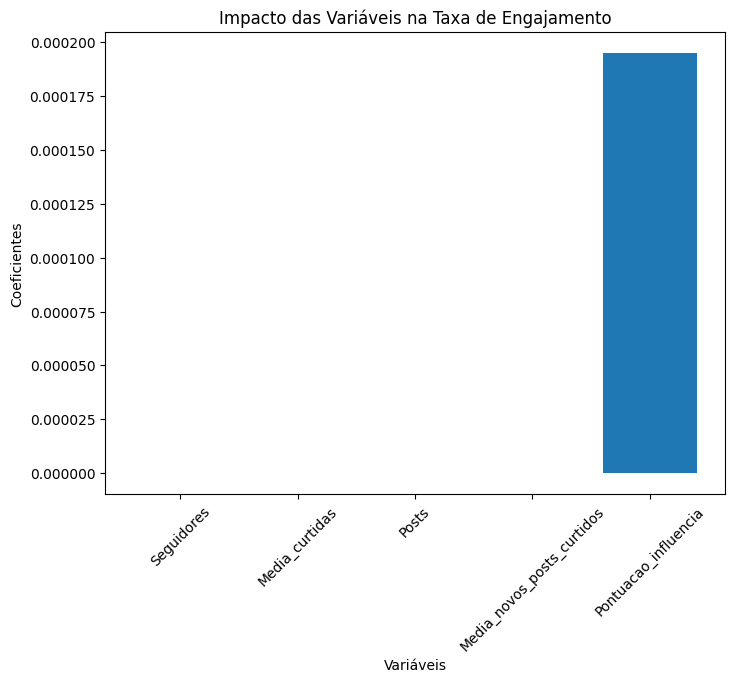

In [301]:
# Gráfico de barras para os coeficientes
plt.figure(figsize=(8, 6))
plt.bar(coef_df['Variável'], coef_df['Coeficiente'])
plt.title('Impacto das Variáveis na Taxa de Engajamento')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.xticks(rotation=45)
plt.show()

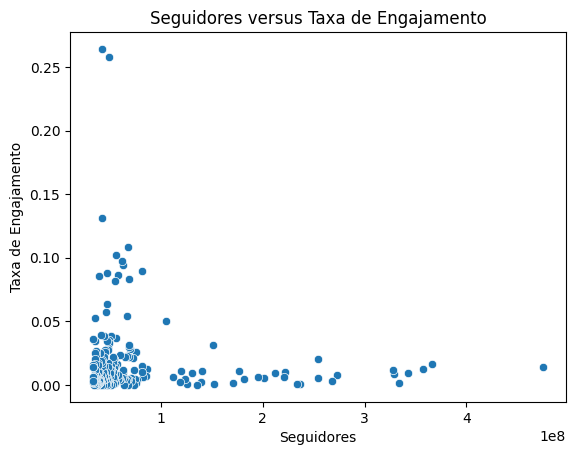

In [302]:
sns.scatterplot(data=insta, x='Seguidores', y='Taxa_engajamento')
plt.title('Seguidores versus Taxa de Engajamento')
plt.xlabel('Seguidores')
plt.ylabel('Taxa de Engajamento')
plt.show()

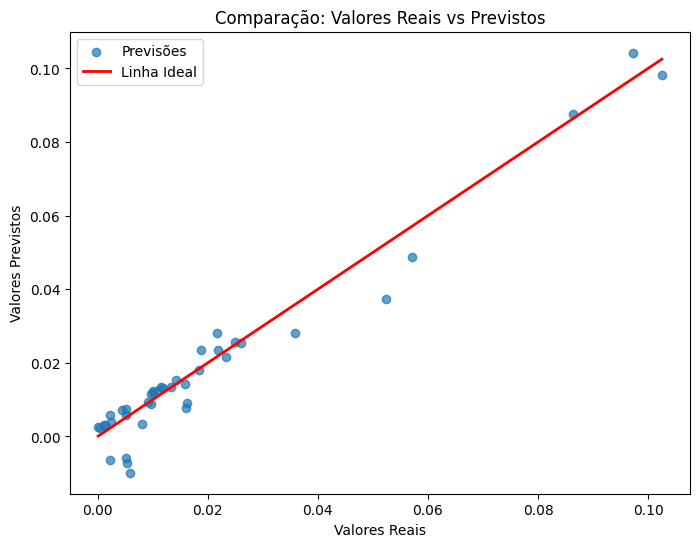

In [303]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação: Valores Reais vs Previstos')
plt.legend()
plt.show()

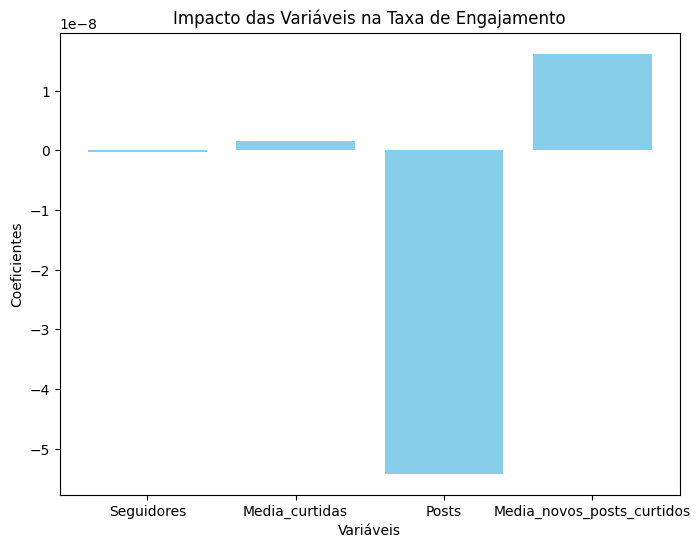

In [304]:
coef_df = pd.DataFrame({
    'Variáveis': ['Seguidores', 'Media_curtidas', 'Posts', 'Media_novos_posts_curtidos'],
    'Coeficientes': [model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]]
})

plt.figure(figsize=(8, 6))
plt.bar(coef_df['Variáveis'], coef_df['Coeficientes'], color='skyblue')
plt.title('Impacto das Variáveis na Taxa de Engajamento')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()

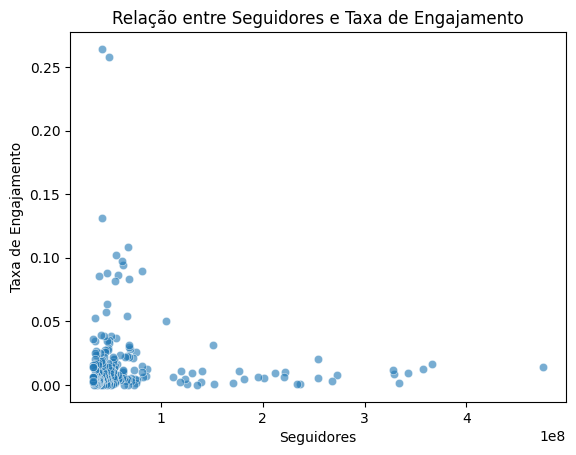

In [305]:
import seaborn as sns
sns.scatterplot(data=insta, x='Seguidores', y='Taxa_engajamento', alpha=0.6)
plt.title('Relação entre Seguidores e Taxa de Engajamento')
plt.xlabel('Seguidores')
plt.ylabel('Taxa de Engajamento')
plt.show()